### Tutorial 18 : Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
X = pd.DataFrame(digits.data, columns=digits.feature_names)

In [5]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
y = digits.target

In [7]:
y.shape

(1797,)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
model.score(X_test, y_test)

0.9814814814814815

In [12]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

In [22]:
predicted = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
cm

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 49,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 63,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 47,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0,  1, 49]])

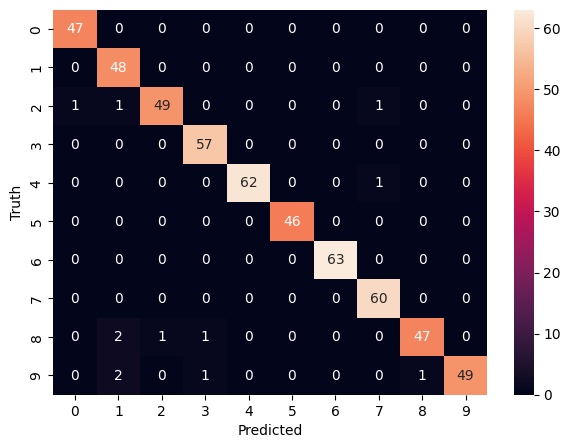

In [25]:
import seaborn as sb
plt.figure(figsize=(7, 5))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.91      1.00      0.95        48
           2       0.98      0.94      0.96        52
           3       0.97      1.00      0.98        57
           4       1.00      0.98      0.99        63
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        63
           7       0.97      1.00      0.98        60
           8       0.98      0.92      0.95        51
           9       1.00      0.92      0.96        53

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [15]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[2, 5, 10, 20, 40, 60, 80]}, cv=5, return_train_score=False)

In [17]:
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.00084572, 0.00138254, 0.0008131 , 0.00205073, 0.00448933,
        0.00377693, 0.00406199]),
 'std_fit_time': array([0.00082075, 0.00049467, 0.0011913 , 0.00317767, 0.00366152,
        0.00425776, 0.0034707 ]),
 'mean_score_time': array([0.0061254 , 0.00821104, 0.01252747, 0.00960608, 0.01704698,
        0.02246008, 0.0247611 ]),
 'std_score_time': array([0.00127421, 0.00227103, 0.00340295, 0.00152062, 0.00257914,
        0.00316955, 0.00406835]),
 'param_n_neighbors': masked_array(data=[2, 5, 10, 20, 40, 60, 80],
              mask=[False, False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 20},
  {'n_neighbors': 40},
  {'n_neighbors': 60},
  {'n_neighbors': 80}],
 'split0_test_score': array([0.96111111, 0.94722222, 0.93055556, 0.925     , 0.92222222,
        0.91666667, 0.91388889]),
 'split1_test_score': array([0.96666667, 0.95555556, 0.94722222

In [18]:
clf.best_score_

np.float64(0.9671711544413494)

In [19]:
clf.best_params_

{'n_neighbors': 2}

In [20]:
res = pd.DataFrame(clf.cv_results_)

In [21]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000846,0.000821,0.006125,0.001274,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
1,0.001383,0.000495,0.008211,0.002271,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,2
2,0.000813,0.001191,0.012527,0.003403,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,3
3,0.002051,0.003178,0.009606,0.001521,20,{'n_neighbors': 20},0.925000,0.950000,0.966574,0.961003,0.944290,0.949373,0.014501,4
4,0.004489,0.003662,0.017047,0.002579,40,{'n_neighbors': 40},0.922222,0.927778,0.930362,0.952646,0.927577,0.932117,0.010601,5
5,0.003777,0.004258,0.022460,0.003170,60,{'n_neighbors': 60},0.916667,0.919444,0.922006,0.935933,0.913649,0.921540,0.007717,6
6,0.004062,0.003471,0.024761,0.004068,80,{'n_neighbors': 80},0.913889,0.905556,0.913649,0.930362,0.908078,0.914307,0.008646,7
